# quant-econ Solutions: The McCall Job Search Model

Solutions for http://quant-econ.net/py/mccall.html

## Exercise 1

Our task is to implement a function that computes the reservation wage, using the logic discussed in the lecture.  Its argument should be an instance of McCallModel.

Here is one solution.  It uses `np.searchsorted` to obtain the first $w$ in the set of possible wages such that $V(w) > U$.

The code assumes that the file `mccall_bellman_iteration.py` is in the same directory as this notebook.

In [4]:
import numpy as np
from mccall_bellman_iteration import solve_mccall_model

def compute_reservation_wage(mcm):
    """
    Computes the reservation wage of an instance of the McCall model
    by finding the smallest w such that V(w) > U.

    If V(w) > U for all w, then the reservation wage w_bar is set to
    the lowest wage in mcm.w_vec.

    If v(w) < U for all w, then w_bar is set to np.inf.
    
    Parameters
    ----------
    mcm : an instance of McCallModel

    Returns
    -------
    w_bar : scalar
        The reservation wage
        
    """

    V, U = solve_mccall_model(mcm)
    w_idx = np.searchsorted(V - U, 0)  

    if w_idx == len(V) + 1:
        w_bar = np.inf
    else:
        w_bar = mcm.w_vec[w_idx]

    return w_bar


Here's a sample of useage

In [5]:
from mccall_bellman_iteration import McCallModel 
mcm = McCallModel()
compute_reservation_wage(mcm)

12.653061224489797

## Exercise 2

We want to plot $\bar w$ againsts $\gamma$.  Here's some suitable code:

In [6]:
%matplotlib inline

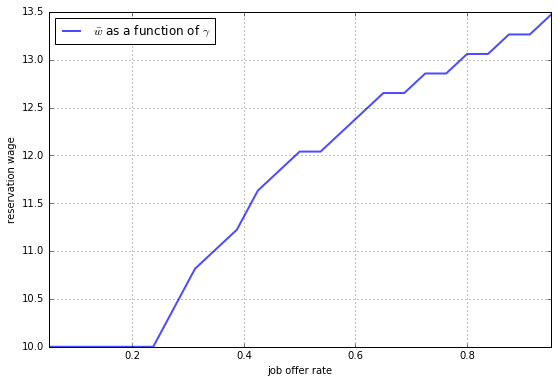

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mccall_bellman_iteration import McCallModel

grid_size = 25  
gamma_vals = np.linspace(0.05, 0.95, grid_size)  
w_bar_vals = np.empty_like(gamma_vals)

mcm = McCallModel()

fig, ax = plt.subplots(figsize=(9, 6))

for i, gamma in enumerate(gamma_vals):
    mcm.gamma = gamma
    w_bar = compute_reservation_wage(mcm)
    w_bar_vals[i] = w_bar

ax.set_xlabel('job offer rate')
ax.set_ylabel('reservation wage')
ax.set_xlim(gamma_vals.min(), gamma_vals.max())
txt = r'$\bar w$ as a function of $\gamma$'
ax.plot(gamma_vals, w_bar_vals, 'b-', lw=2, alpha=0.7, label=txt)
ax.legend(loc='upper left')
ax.grid()

plt.show()


As expected, the reservation wage increases in $\gamma$.

This is because higher $\gamma$ translates to a more favorable job search environment.

Hence workers are less willing to accept lower offers.